# Árvores de Decisão

In [9]:
import aux

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier

# Carregar os datasets
og_df, pca_df, pearson_df, lda_df = aux.get_datasets()

# Preparar listas para comparação
auc_values = []
f1_score_values = []

## Random Forest

### Dataset Original - não vamos rodar

In [3]:
og_X_train, og_X_test, og_y_train, og_y_test = aux.prepare_dataset(og_df)

Vamos buscar os melhores hiperparâmetros

In [4]:
params = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'max_features': ['sqrt', 'log2', None]
}

rand_for_model = RandomForestClassifier()
grid_search = GridSearchCV(rand_for_model, params, cv=2)
grid_search.fit(og_X_train, og_y_train)

print(grid_search.best_params_)

KeyboardInterrupt: 

In [19]:
rand_for = RandomForestClassifier().fit(og_X_train, og_y_train)
y_pred = rand_for.predict(og_X_test)

auc, f1 = aux.analyse_ml_results(og_y_test, y_pred)
auc_values.append(auc)
f1_score_values.append(f1)

Verdadeiros Ataques: 7257, Falsos Não-Ataques: 13
Falsos Ataques: 36, Verdadeiros Não-Ataques: 7199
AUC: 0.997
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      7270
           1       1.00      1.00      1.00      7235

    accuracy                           1.00     14505
   macro avg       1.00      1.00      1.00     14505
weighted avg       1.00      1.00      1.00     14505



### Dataset Reduzido por Pearson

In [10]:
pearson_X_train, pearson_X_test, pearson_y_train, pearson_y_test = aux.prepare_dataset(pearson_df)

In [13]:
params = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 30, 50],
    'max_features': ['sqrt', 'log2', None]
}

rand_for_model = RandomForestClassifier()
random_search = RandomizedSearchCV(rand_for_model, params, random_state=42, n_jobs=-1)
random_search.fit(pearson_X_train, pearson_y_train)

pearson_best_params = random_search.best_params_
print(random_search.best_params_)

{'n_estimators': 300, 'max_features': 'log2', 'max_depth': 50}


In [14]:
rand_for = RandomForestClassifier(**pearson_best_params).fit(pearson_X_train, pearson_y_train)
y_pred = rand_for.predict(pearson_X_test)

auc, f1 = aux.analyse_ml_results(pearson_y_test, y_pred)
auc_values.append(auc)
f1_score_values.append(f1)

Verdadeiros Ataques: 7265, Falsos Não-Ataques: 5
Falsos Ataques: 57, Verdadeiros Não-Ataques: 7178
AUC: 0.996
              precision    recall  f1-score   support

          -1       0.99      1.00      1.00      7270
           1       1.00      0.99      1.00      7235

    accuracy                           1.00     14505
   macro avg       1.00      1.00      1.00     14505
weighted avg       1.00      1.00      1.00     14505



### Dataset Reduzido por PCA

In [15]:
pca_X_train, pca_X_test, pca_y_train, pca_y_test = aux.prepare_dataset(pca_df)

In [16]:
rand_for_model = RandomForestClassifier()
random_search = RandomizedSearchCV(rand_for_model, params, random_state=42, n_jobs=-1)
random_search.fit(pca_X_train, pca_y_train)

pca_best_params = random_search.best_params_
print(random_search.best_params_)

{'n_estimators': 100, 'max_features': 'log2', 'max_depth': 30}


In [17]:
rand_for = RandomForestClassifier(**pca_best_params).fit(pca_X_train, pca_y_train)
y_pred = rand_for.predict(pca_X_test)

auc, f1 = aux.analyse_ml_results(pca_y_test, y_pred)
auc_values.append(auc)
f1_score_values.append(f1)

Verdadeiros Ataques: 7257, Falsos Não-Ataques: 13
Falsos Ataques: 79, Verdadeiros Não-Ataques: 7156
AUC: 0.994
              precision    recall  f1-score   support

        -1.0       0.99      1.00      0.99      7270
         1.0       1.00      0.99      0.99      7235

    accuracy                           0.99     14505
   macro avg       0.99      0.99      0.99     14505
weighted avg       0.99      0.99      0.99     14505



### Dataset Reduzido por LDA

In [19]:
lda_X_train, lda_X_test, lda_y_train, lda_y_test = aux.prepare_dataset(lda_df)

In [20]:
rand_for_model = RandomForestClassifier()
random_search = RandomizedSearchCV(rand_for_model, params, random_state=42, n_jobs=-1)
random_search.fit(lda_X_train, lda_y_train)

lda_best_params = random_search.best_params_
print(random_search.best_params_)

{'n_estimators': 100, 'max_features': 'log2', 'max_depth': 10}


In [21]:
rand_for = RandomForestClassifier(**lda_best_params).fit(lda_X_train, lda_y_train)
y_pred = rand_for.predict(lda_X_test)

auc, f1 = aux.analyse_ml_results(lda_y_test, y_pred)
auc_values.append(auc)
f1_score_values.append(f1)

Verdadeiros Ataques: 7255, Falsos Não-Ataques: 15
Falsos Ataques: 117, Verdadeiros Não-Ataques: 7118
AUC: 0.991
              precision    recall  f1-score   support

        -1.0       0.98      1.00      0.99      7270
         1.0       1.00      0.98      0.99      7235

    accuracy                           0.99     14505
   macro avg       0.99      0.99      0.99     14505
weighted avg       0.99      0.99      0.99     14505



### Comparando os três métodos:

In [22]:
print(auc_values, f1_score_values)

[0.996, 0.994, 0.991] [0.9957255199450288, 0.9936571585659336, 0.9908990852845465]


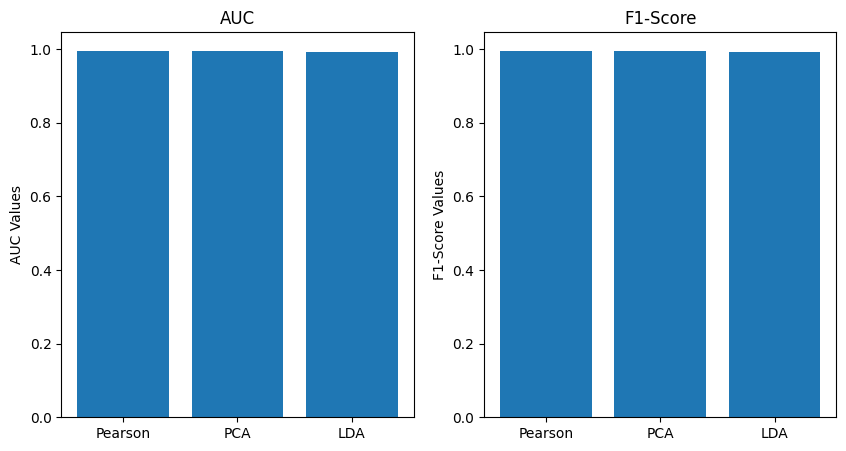

In [23]:
aux.plot_auc_and_f1_reduced(auc_values, f1_score_values)

## Gradient Boosting

In [33]:
auc_values = []
f1_score_values = []

### Dataset Original - não vamos rodar

In [ ]:
params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_iter': [100, 300],
    'max_leaf_nodes': [10, 31, 50]
}

hist_grad_model = HistGradientBoostingClassifier()
grid_search = GridSearchCV(hist_grad_model, params, cv=2)
grid_search.fit(og_X_train, og_y_train)

print(grid_search.best_params_)

In [26]:
hist_grad_for = HistGradientBoostingClassifier().fit(og_X_train, og_y_train)
y_pred = hist_grad_for.predict(og_X_test)

auc, f1 = aux.analyse_ml_results(og_y_test, y_pred)
auc_values.append(auc)
f1_score_values.append(f1)

Verdadeiros Ataques: 7255, Falsos Não-Ataques: 15
Falsos Ataques: 36, Verdadeiros Não-Ataques: 7199
AUC: 0.996
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      7270
           1       1.00      1.00      1.00      7235

    accuracy                           1.00     14505
   macro avg       1.00      1.00      1.00     14505
weighted avg       1.00      1.00      1.00     14505



### Dataset Reduzido por Pearson

In [34]:
params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_iter': [100, 300],
    'max_leaf_nodes': [10, 31, 50]
}

hist_grad_model = HistGradientBoostingClassifier()
random_search = RandomizedSearchCV(hist_grad_model, params, random_state=42, n_jobs=-1)
random_search.fit(pearson_X_train, pearson_y_train)

pearson_best_params = random_search.best_params_
print(random_search.best_params_)

{'max_leaf_nodes': 31, 'max_iter': 300, 'learning_rate': 0.2}


In [35]:
hist_grad = HistGradientBoostingClassifier(**pearson_best_params).fit(pearson_X_train, pearson_y_train)
y_pred = hist_grad.predict(pearson_X_test)

auc, f1 = aux.analyse_ml_results(pearson_y_test, y_pred)
auc_values.append(auc)
f1_score_values.append(f1)

Verdadeiros Ataques: 7265, Falsos Não-Ataques: 5
Falsos Ataques: 58, Verdadeiros Não-Ataques: 7177
AUC: 0.996
              precision    recall  f1-score   support

          -1       0.99      1.00      1.00      7270
           1       1.00      0.99      1.00      7235

    accuracy                           1.00     14505
   macro avg       1.00      1.00      1.00     14505
weighted avg       1.00      1.00      1.00     14505



### Dataset Reduzido por PCA

In [36]:
hist_grad_model = HistGradientBoostingClassifier()
random_search = RandomizedSearchCV(hist_grad_model, params, random_state=42, n_jobs=-1)
random_search.fit(pca_X_train, pca_y_train)

pca_best_params = random_search.best_params_
print(random_search.best_params_)

{'max_leaf_nodes': 31, 'max_iter': 300, 'learning_rate': 0.2}


In [37]:
hist_grad = HistGradientBoostingClassifier(**pca_best_params).fit(pca_X_train, pca_y_train)
y_pred = hist_grad.predict(pca_X_test)

auc, f1 = aux.analyse_ml_results(pca_y_test, y_pred)
auc_values.append(auc)
f1_score_values.append(f1)

Verdadeiros Ataques: 7254, Falsos Não-Ataques: 16
Falsos Ataques: 85, Verdadeiros Não-Ataques: 7150
AUC: 0.993
              precision    recall  f1-score   support

        -1.0       0.99      1.00      0.99      7270
         1.0       1.00      0.99      0.99      7235

    accuracy                           0.99     14505
   macro avg       0.99      0.99      0.99     14505
weighted avg       0.99      0.99      0.99     14505



### Dataset Reduzido por LDA

In [38]:
hist_grad_model = HistGradientBoostingClassifier()
grid_search = RandomizedSearchCV(hist_grad_model, params, random_state=42, n_jobs=-1)
grid_search.fit(lda_X_train, lda_y_train)

lda_best_params = random_search.best_params_
print(grid_search.best_params_)

{'max_leaf_nodes': 31, 'max_iter': 100, 'learning_rate': 0.2}


In [39]:
hist_grad = HistGradientBoostingClassifier(**lda_best_params).fit(lda_X_train, lda_y_train)
y_pred = hist_grad.predict(lda_X_test)

auc, f1 = aux.analyse_ml_results(lda_y_test, y_pred)
auc_values.append(auc)
f1_score_values.append(f1)

Verdadeiros Ataques: 7228, Falsos Não-Ataques: 42
Falsos Ataques: 127, Verdadeiros Não-Ataques: 7108
AUC: 0.988
              precision    recall  f1-score   support

        -1.0       0.98      0.99      0.99      7270
         1.0       0.99      0.98      0.99      7235

    accuracy                           0.99     14505
   macro avg       0.99      0.99      0.99     14505
weighted avg       0.99      0.99      0.99     14505



### Comparando os três métodos:

In [40]:
print(auc_values, f1_score_values)

[0.996, 0.993, 0.988] [0.9956565738280351, 0.9930366463280657, 0.9883482803364143]


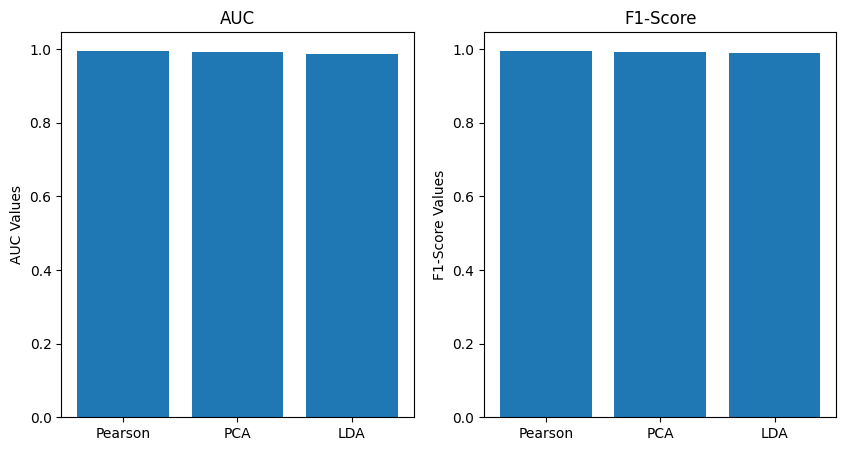

In [41]:
aux.plot_auc_and_f1_reduced(auc_values, f1_score_values)